## 상관관계
- 두 변수간 관계성 강도 측정 통계지표
- -1 < 0 < 1 (기준 : 0.5)
    * 1 : 양에 관계로 깊다
    * 0 : 관계 없다
    * -1 : 음에 관계로 있다.

### 간단한 예정

In [59]:
import pandas as pd

# 두 변수 데이터 (예: 주식 A와 주식 B의 일간 수익률) 

data = { 'Stock_A': [0.02, 0.01, -0.01, 0.03, -0.02], 'Stock_B': [0.01, 0.03, -0.02, 0.04, -0.01] }

df_first = pd.DataFrame(data)
df_first

,Stock_A,Stock_B
0,0.02,0.01
1,0.01,0.03
2,-0.01,-0.02
3,0.03,0.04
4,-0.02,-0.01


In [60]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_A  5 non-null      float64
 1   Stock_B  5 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [61]:
df_first.corr()

,Stock_A,Stock_B
Stock_A,1.00000,0.85118
Stock_B,0.85118,1.00000


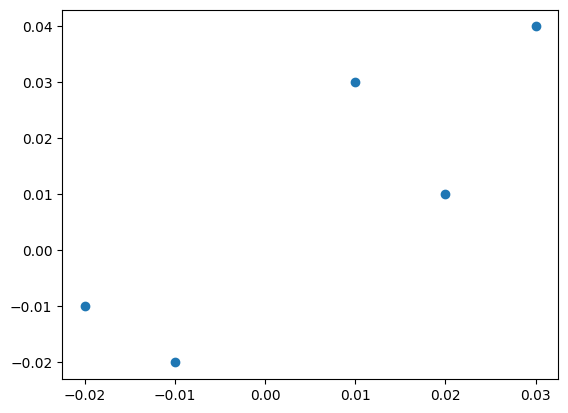

In [62]:
import matplotlib.pyplot as plt

plt.scatter(df_first['Stock_A'], df_first['Stock_B'])
plt.show()

### 실 주식 데이터 상관관계 확인

In [63]:
# 개별 종목 데이터: 국내외 심볼 혼합 
stocks = { 
          'S&P500': 'S&P500', # S&P500
          'AAPL': 'Apple (US)', # 애플 (미국)
          'MSFT': 'Microsoft (US)', # 마이크로소프트 (미국)
          '005930': 'Samsung (KR)', # 삼성전자 (한국)
          '000660': 'SK Hynix (KR)'   # SK하이닉스 (한국) 
          }

In [64]:
import FinanceDataReader as fdr

In [65]:
start_day ='2023'
df_sp500 = fdr.DataReader('S&P500', start_day)
df_msft = fdr.DataReader('MSFT', start_day)
df_skhynix = fdr.DataReader('000660', start_day)

In [66]:
# 각 정보확인
# df_sp500.info()   # 499
# df_msft.info()    # 499
df_skhynix.info() # 488

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 2023-01-02 to 2024-12-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    488 non-null    int64  
 1   High    488 non-null    int64  
 2   Low     488 non-null    int64  
 3   Close   488 non-null    int64  
 4   Volume  488 non-null    int64  
 5   Change  488 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 26.7 KB


In [67]:
# df_sp500[['Close']] # Dataframe
df_sp500_close = df_sp500[['Close']].rename(columns={'Close':'SP500'}) # 새로운 이름지정 할때 rename(columns={ : }) 사용
# df_sp500_close

In [68]:
df_msft_close = df_msft[['Close']].rename(columns={'Close':'MSFT'})

In [69]:
df_skhynix_close = df_skhynix[['Close']].rename(columns={'Close':'SKhynix'})

In [70]:
# 도중 추가해서 비교하기 위해 추가가
df_samsung = fdr.DataReader('005930', start_day)
df_samsung_close = df_samsung[['Close']].rename(columns={'Close':'Samsung'})

In [71]:
df_corr = pd.concat([df_sp500_close, df_msft_close, df_skhynix_close,df_samsung_close], axis = 1)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2023-01-02 to 2024-12-27
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP500    499 non-null    float64
 1   MSFT     499 non-null    float64
 2   SKhynix  488 non-null    float64
 3   Samsung  488 non-null    float64
dtypes: float64(4)
memory usage: 20.2 KB


In [72]:
df_corr.dropna(inplace=True)

In [73]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 2023-01-03 to 2024-12-26
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP500    471 non-null    float64
 1   MSFT     471 non-null    float64
 2   SKhynix  471 non-null    float64
 3   Samsung  471 non-null    float64
dtypes: float64(4)
memory usage: 18.4 KB


In [75]:
correlation_matrix = df_corr.corr()
correlation_matrix

,SP500,MSFT,SKhynix,Samsung
SP500,1.000000,0.912200,0.889020,0.084073
MSFT,0.912200,1.000000,0.920752,0.390099
SKhynix,0.889020,0.920752,1.000000,0.427682
Samsung,0.084073,0.390099,0.427682,1.000000


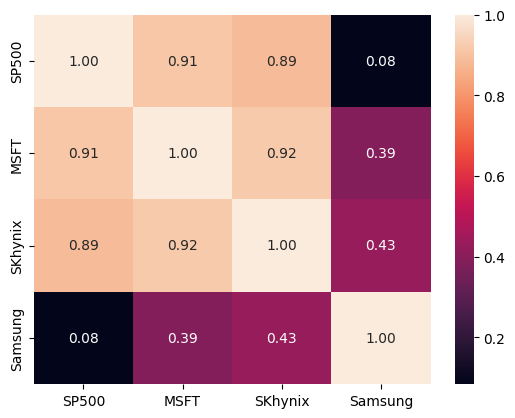

In [78]:
import seaborn as sns

# sns.heatmap(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt = '.2f') 

plt.show()